In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# K - Means Cluster

k is predefined (k = 2, 3 ....)

    1) Choose 3 random points to be centroids

    2) Calculate distance for each point to those centroids. 
        [assigning points to the closest centroid] = expectation

    3) Compute new centroids based on the points tha have been assigned to the previous centroids = maximization

# Principal Component Analysis (PCA)

Definition 1 : It is used for dimensionality reduction (Find the principal direction)

Definition 2 : It is the component (direction) with the largest variance

- The largest variance is calculated based on the minimization of the projection residuals or maximizing the variance

- THe idea behind PCA is based on eigenvalues and eigenmodes analysis 



In [2]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+") # with sep : we set all the spaces to be date separators 

In [3]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
# Plot each one against one another 
for i in range(len(cols) - 1):
    for j in range(i+1, len(cols) - 1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x = x_label, y = y_label, data = df, hue = 'class')
        plt.show()

# Clustering

In [6]:
from sklearn.cluster import KMeans

In [19]:
#In this excercise c and y just refer to the two chosen features, and not x and y in the sense of feature and target
x = "compactness"
y = "asymmetry"
X = df[[x,y]].values


In [20]:
kmeans = KMeans(n_clusters=  3).fit(X)
clusters = kmeans.labels_

In [21]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns = [x, y, "class"])

[]

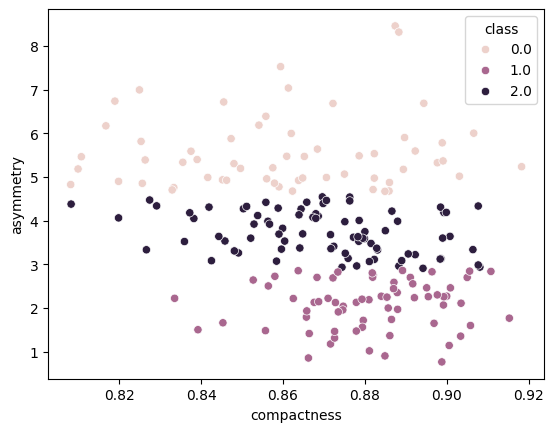

In [22]:
# K Means classes
sns.scatterplot(x = x, y = y, hue = 'class', data = cluster_df)
plt.plot()

[]

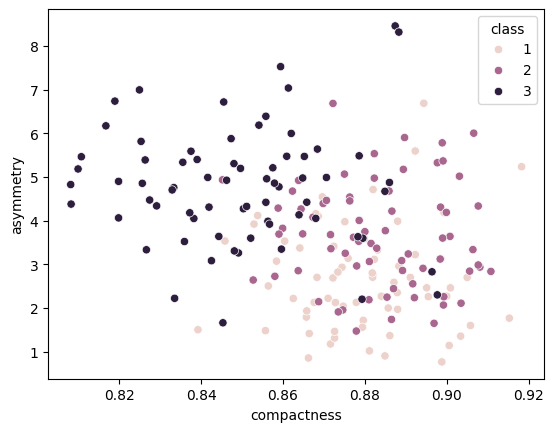

In [23]:
# Original classes
sns.scatterplot(x = x, y = y, hue = 'class', data = df)
plt.plot()

# Higher DImensions 

In [25]:
X = df[cols[:-1]].values


In [28]:
kmeans = KMeans(n_clusters= 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))), columns = df.columns)

[]

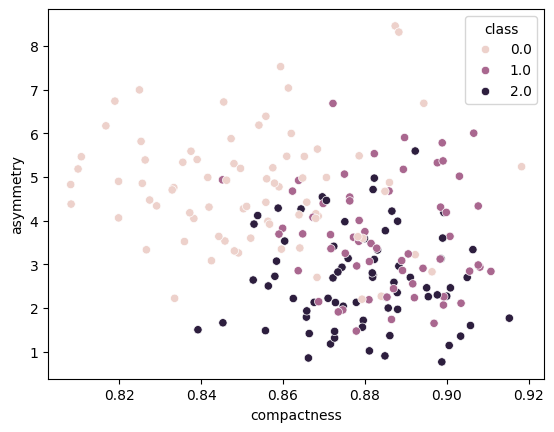

In [29]:
# Original classes
sns.scatterplot(x = x, y = y, hue = 'class', data = cluster_df)
plt.plot()

# PCA

In [30]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 2)
transformed_x = pca.fit_transform(X)

In [35]:
X.shape


(210, 7)

In [36]:
transformed_x.shape # New dimensions

(210, 2)

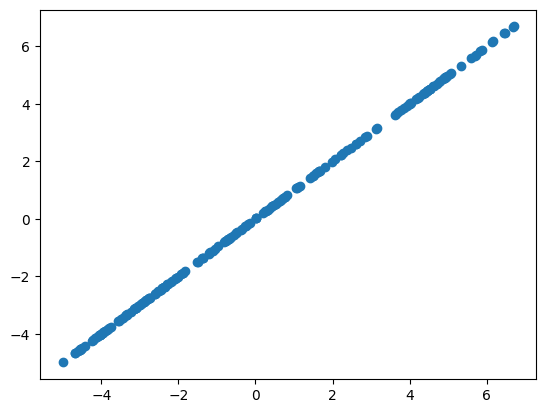

In [38]:
plt.scatter(transformed_x[:,0], transformed_x[:,0])
plt.show()

In [39]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns=["pca1" , "pca2", "class"])

In [40]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1,1))), columns=["pca1" , "pca2", "class"])

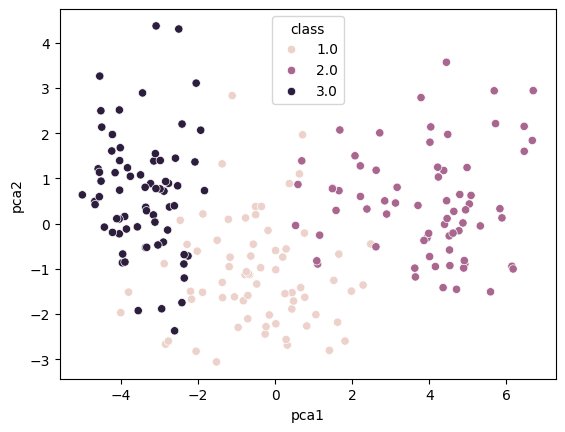

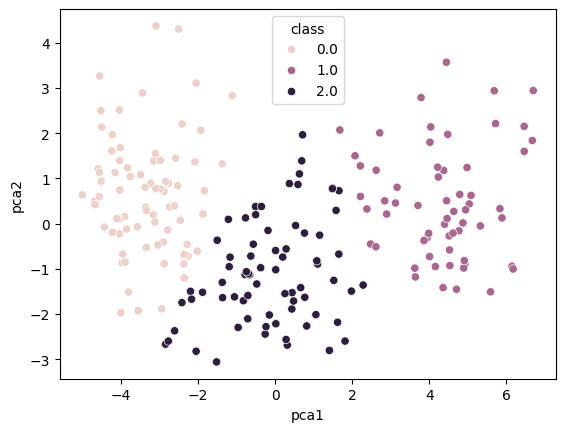

In [44]:
# Truth classes
sns.scatterplot(x = "pca1", y = "pca2", hue = 'class', data = truth_pca_df)
plt.plot()
plt.show()

# K Means classes
sns.scatterplot(x = "pca1", y = "pca2", hue = 'class', data = kmeans_pca_df)
plt.plot()
plt.show()
